# Google_Play_Store_Apps

In [36]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

There are two files, one is about app, another is about user feedback 
<br>First have a look on app

### Google Play Store

In [2]:
data_app=pd.read_csv('googleplaystore.csv')

In [3]:
data_app.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [4]:
data_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
data_app.shape

(10841, 13)

There are over 10k of app in the dataset 

In [6]:
data_app.isnull().any()

App               False
Category          False
Rating             True
Reviews           False
Size              False
Installs          False
Type               True
Price             False
Content Rating     True
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool

There are some records with missing values. For better exploration, those records will be deleted from dataset 

In [7]:
data_app.dropna(inplace=True)

In [8]:
data_app.shape

(9360, 13)

9360 records are remained 

In [9]:
data_app.describe()

Rating
count  9360.000000
mean      4.191838
std       0.515263
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max       5.000000

In the dataset, only rating is classified as numeric and therefore describe() shows the distribution of rating.
<br>However, price and reviews should also be available in numeric format. Let's change them back to numeric 

First is to clean price. 

In [10]:
set(data_app['Price'])

{'$0.99',
 '$1.00',
 '$1.20',
 '$1.29',
 '$1.49',
 '$1.50',
 '$1.59',
 '$1.61',
 '$1.70',
 '$1.75',
 '$1.76',
 '$1.97',
 '$1.99',
 '$10.00',
 '$10.99',
 '$11.99',
 '$12.99',
 '$13.99',
 '$14.00',
 '$14.99',
 '$15.46',
 '$15.99',
 '$16.99',
 '$17.99',
 '$18.99',
 '$19.40',
 '$19.99',
 '$2.00',
 '$2.49',
 '$2.50',
 '$2.56',
 '$2.59',
 '$2.90',
 '$2.95',
 '$2.99',
 '$24.99',
 '$29.99',
 '$299.99',
 '$3.02',
 '$3.04',
 '$3.08',
 '$3.28',
 '$3.49',
 '$3.88',
 '$3.90',
 '$3.95',
 '$3.99',
 '$33.99',
 '$37.99',
 '$379.99',
 '$389.99',
 '$39.99',
 '$399.99',
 '$4.29',
 '$4.49',
 '$4.59',
 '$4.60',
 '$4.77',
 '$4.84',
 '$4.99',
 '$400.00',
 '$5.49',
 '$5.99',
 '$6.49',
 '$6.99',
 '$7.49',
 '$7.99',
 '$79.99',
 '$8.49',
 '$8.99',
 '$9.00',
 '$9.99',
 '0'}

So the problem is the dollar sign. So the only work to do is to remove the dollar sign and assign as numberic format 

In [11]:
data_app['Price']=data_app['Price'].apply(lambda x : x.strip('$'))
data_app['Price']=data_app['Price'].astype('float')

In [12]:
data_app.Price.dtype

dtype('float64')

One is done; Next: reviews

In [13]:
set(data_app['Reviews'])

{'16815',
 '1320',
 '567984',
 '3378',
 '1251479',
 '375996',
 '43645',
 '916',
 '130',
 '1904',
 '9389',
 '834',
 '234589',
 '101686',
 '19877',
 '7252',
 '3114',
 '10806',
 '3502',
 '11263',
 '40934',
 '8936',
 '125232',
 '12435',
 '2131',
 '27386',
 '58820',
 '1152',
 '441473',
 '5695',
 '798522',
 '9403',
 '51504',
 '213340',
 '58387',
 '8038',
 '1947',
 '4254879',
 '644',
 '501498',
 '1388',
 '216388',
 '1539',
 '175293',
 '1107197',
 '4476',
 '36',
 '7812',
 '552635',
 '7619',
 '1914',
 '3704',
 '220',
 '8649',
 '7728',
 '42871',
 '43191',
 '244371',
 '91035',
 '7279',
 '2436',
 '15922',
 '155',
 '495',
 '5481',
 '55408',
 '39647',
 '44891723',
 '13079',
 '25952',
 '32014',
 '5387333',
 '11051',
 '78158306',
 '462702',
 '29940',
 '87873',
 '327599',
 '7687',
 '151080',
 '3648120',
 '805',
 '84911',
 '27501',
 '52390',
 '650',
 '673203',
 '4559407',
 '86961',
 '341234',
 '42432',
 '4184',
 '1925',
 '66740',
 '6198563',
 '3277209',
 '621',
 '714',
 '47698',
 '148536',
 '4726',
 '48

Can't spot the problem by eye looking only
<br>Then try change the whole column to numeric and see if any problem 

In [14]:
data_app['Reviews']=data_app['Reviews'].astype('float')

In [15]:
data_app.Reviews.dtypes

dtype('float64')

In [16]:
data_app.describe()

Rating       Reviews        Price
count  9360.000000  9.360000e+03  9360.000000
mean      4.191838  5.143767e+05     0.961279
std       0.515263  3.145023e+06    15.821640
min       1.000000  1.000000e+00     0.000000
25%       4.000000  1.867500e+02     0.000000
50%       4.300000  5.955000e+03     0.000000
75%       4.500000  8.162750e+04     0.000000
max       5.000000  7.815831e+07   400.000000

Both columns are now in numeric formats and therefore we can see the summary from describe function 

Obvious finding is that over 75% of apps on Google play are free. And there is an app costing 400 USD. 

In [17]:
data_app[data_app['Price']==400]

App   Category  Rating  Reviews  Size Installs  \
4367  I'm Rich - Trump Edition  LIFESTYLE     3.6    275.0  7.3M  10,000+   

      Type  Price Content Rating     Genres Last Updated Current Ver  \
4367  Paid  400.0       Everyone  Lifestyle  May 3, 2018       1.0.1   

     Android Ver  
4367  4.1 and up

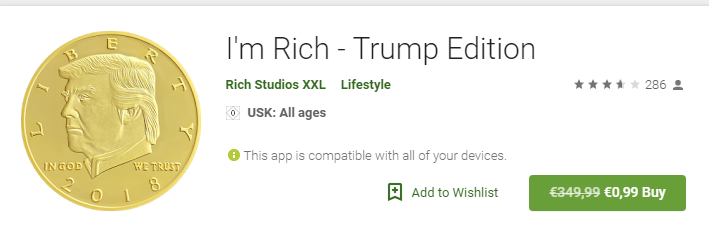

Too bad that the price already reduces to Eur0.99 (in euro due to my geolocation). Can't prove that I'm rich :(

In the dataset, there is a column called type, and it seems also related to price of app. If so then we can delete this column to reduce redundancy.

In [18]:
data_app['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [19]:
data_app[data_app['Type']=='Free']['Price'].unique()

array([0.])

In [20]:
data_app[data_app['Type']=='Paid']['Price'].unique()

array([  4.99,   3.99,   6.99,   7.99,   5.99,   2.99,   3.49,   1.99,
         9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,  24.99,  11.99,
        79.99,  16.99,  14.99,  29.99,  12.99,   2.49,  10.99,   1.5 ,
        19.99,  15.99,  33.99,  39.99,   3.95,   4.49,   1.7 ,   8.99,
         1.49,   3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,   4.84,
         4.77,   1.61,   2.5 ,   1.59,   6.49,   1.29, 299.99, 379.99,
        37.99,  18.99, 389.99,   8.49,   1.75,  14.  ,   2.  ,   3.08,
         2.59,  19.4 ,   3.9 ,   4.59,  15.46,   3.04,  13.99,   4.29,
         3.28,   4.6 ,   1.  ,   2.95,   2.9 ,   1.97,   2.56,   1.2 ])

We can deduce the values of type by using price column only, so we can delete it 

In [21]:
del data_app['Type']

It's time for exploration 

First is about the rating and review

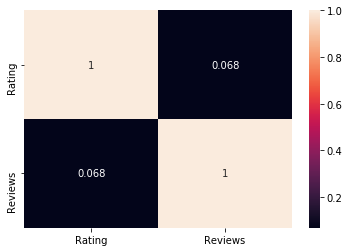

In [22]:
sns.heatmap(data_app[['Rating','Reviews']].corr(),annot=True)
plt.show()

Apparently there is no any correlation between rating and reviews
<br>Second is about rating and price

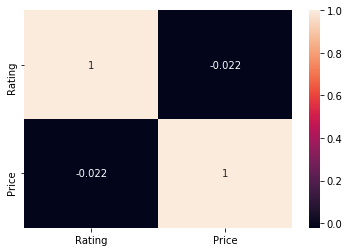

In [23]:
sns.heatmap(data_app[['Rating','Price']].corr(),annot=True)
plt.show()

Neither do between rating and price

Finally is about rating and install 

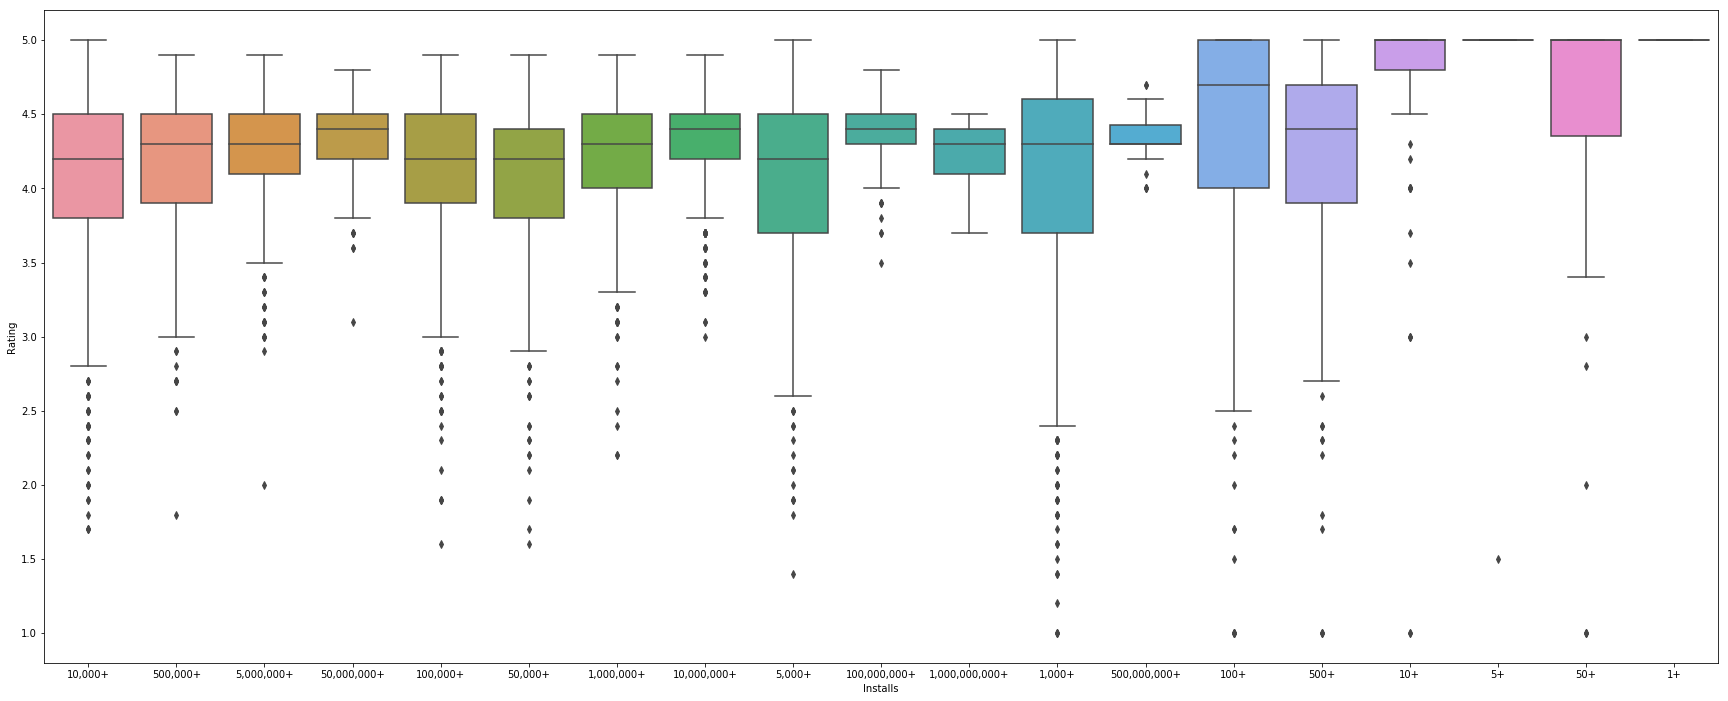

In [24]:
plt.figure(figsize=(30,12))
sns.boxplot(x='Installs',y='Rating',data=data_app)
plt.show()

No matter how many installation, the ratings are still above 4. 

Second analysis is about category of app. 

In [25]:
data_app['Category'].value_counts()

FAMILY                 1746
GAME                   1097
TOOLS                   733
PRODUCTIVITY            351
MEDICAL                 350
COMMUNICATION           328
FINANCE                 323
SPORTS                  319
PHOTOGRAPHY             317
LIFESTYLE               314
PERSONALIZATION         312
BUSINESS                303
HEALTH_AND_FITNESS      297
SOCIAL                  259
SHOPPING                238
NEWS_AND_MAGAZINES      233
TRAVEL_AND_LOCAL        226
DATING                  195
BOOKS_AND_REFERENCE     178
VIDEO_PLAYERS           160
EDUCATION               155
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     124
FOOD_AND_DRINK          109
HOUSE_AND_HOME           76
WEATHER                  75
AUTO_AND_VEHICLES        73
LIBRARIES_AND_DEMO       64
ART_AND_DESIGN           61
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

Top three categories of app are Family,Game and Tools

Based on these three categories, we can further breakdown by Genres and see which one among each category is dominant

In [26]:
for i in ['FAMILY','GAME','TOOLS']:
    print(data_app[data_app['Category']==i]['Genres'].value_counts().head(3))

Entertainment    397
Education        340
Simulation       183
Name: Genres, dtype: int64
Action    358
Arcade    207
Racing     93
Name: Genres, dtype: int64
Tools              732
Tools;Education      1
Name: Genres, dtype: int64


Since most apps are free, it is more important that paid apps have more attractive features for attracting payment

In [27]:
paid_app=data_app[data_app['Price']>0]

In [28]:
paid_app.shape[0]

645

There are 645 paid apps. 

In [29]:
paid_app['Category'].value_counts()

FAMILY                 161
MEDICAL                 88
GAME                    77
PERSONALIZATION         66
TOOLS                   63
SPORTS                  22
COMMUNICATION           22
PHOTOGRAPHY             18
LIFESTYLE               18
PRODUCTIVITY            18
FINANCE                 13
HEALTH_AND_FITNESS      12
BUSINESS                11
TRAVEL_AND_LOCAL         8
BOOKS_AND_REFERENCE      8
WEATHER                  7
MAPS_AND_NAVIGATION      5
EDUCATION                4
VIDEO_PLAYERS            4
DATING                   4
ART_AND_DESIGN           3
SHOPPING                 2
ENTERTAINMENT            2
SOCIAL                   2
PARENTING                2
FOOD_AND_DRINK           2
NEWS_AND_MAGAZINES       2
AUTO_AND_VEHICLES        1
Name: Category, dtype: int64

Family and game are still on top three categories, however medical became the second.

In [30]:
for i in ['FAMILY','GAME','MEDICAL']:
    print(paid_app[paid_app['Category']==i ]['Genres'].value_counts().head(3))

Role Playing    21
Education       18
Puzzle          14
Name: Genres, dtype: int64
Action       24
Arcade       17
Adventure    12
Name: Genres, dtype: int64
Medical    88
Name: Genres, dtype: int64


There is no much change on genres for both family and game categories.

As users paid for the apps, they may have higher expectation than free apps. This may be reflected on rating. 

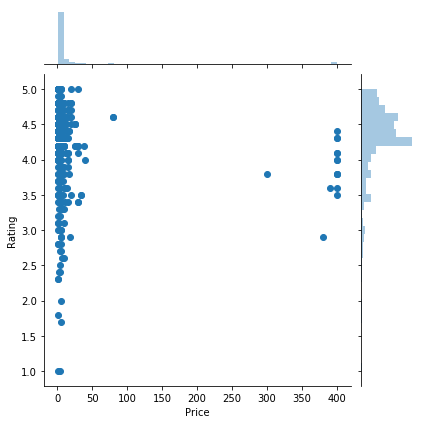

In [31]:
sns.jointplot('Price','Rating',data=paid_app)

Apparently the joint plot was distorted by some 'abnormal' high cost of apps.
<br>One more plot is necessary for those 'normal' price apps

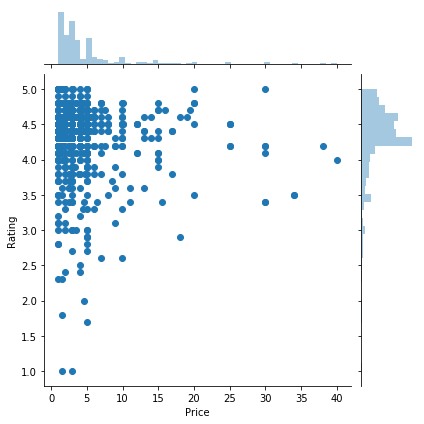

In [32]:
sns.jointplot('Price','Rating',data=paid_app[paid_app['Price']<50])

In [33]:
paid_app[paid_app['Price']<50]['Rating'].mean()

4.275318471337579

However, the average rating for paid app are even higher than free apps.
<br>Probably because developers of paid apps focus more on user experience and provide more satisfying functions to users

As there are many free apps already in Google Play, paid app must have outstanding features to attract user. Name is one of easy ways to attract users. We can have a look on those names of apps and see if there is any particular word that can attract users to pay

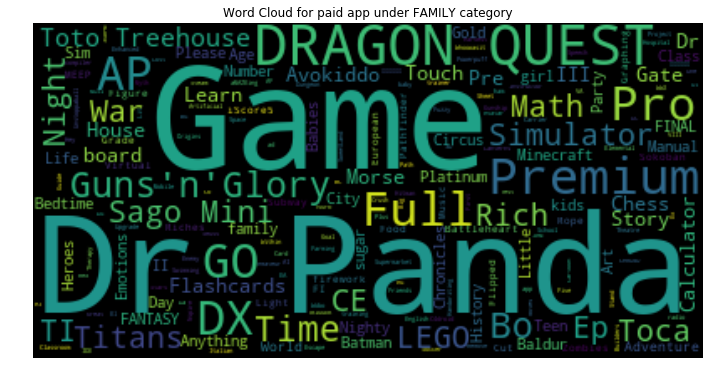

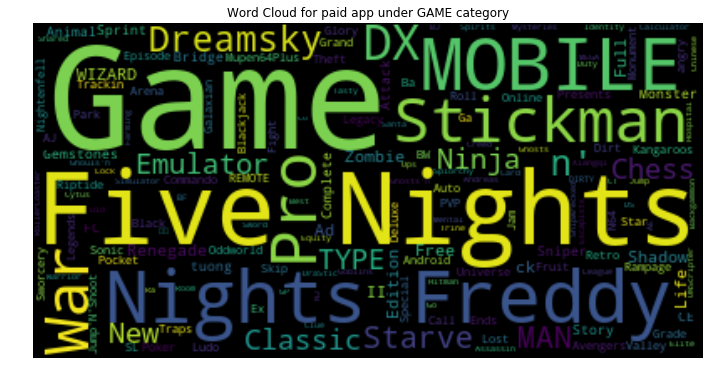

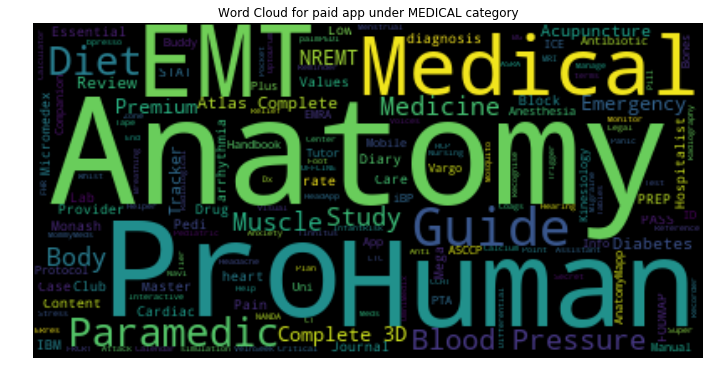

In [49]:
for i in ['FAMILY','GAME','MEDICAL']:
    name_list=" ".join(name for name in paid_app[paid_app['Category']==i].App)
    wordcloud=WordCloud().generate(name_list)
    plt.figure(figsize=(12,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title('Word Cloud for paid app under {} category'.format(i))
    plt.show()

"Game" and "Medical" are two popular words. This is no surprise.
<br>Maybe we can exclude these two words and run again 

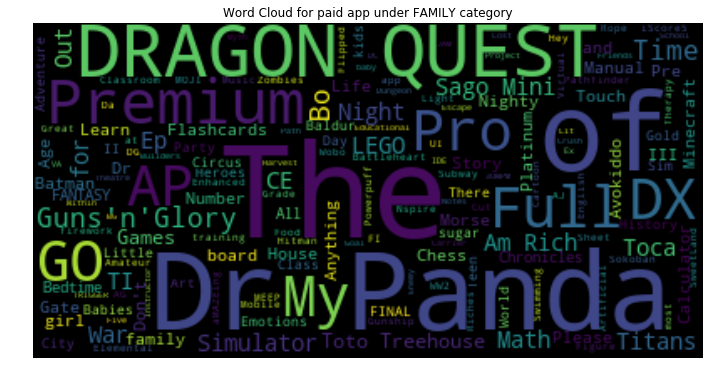

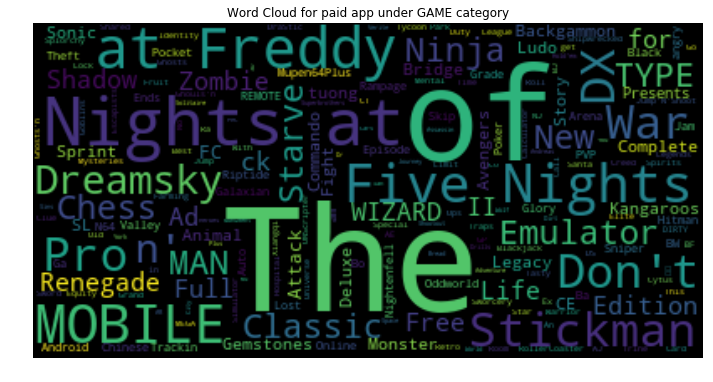

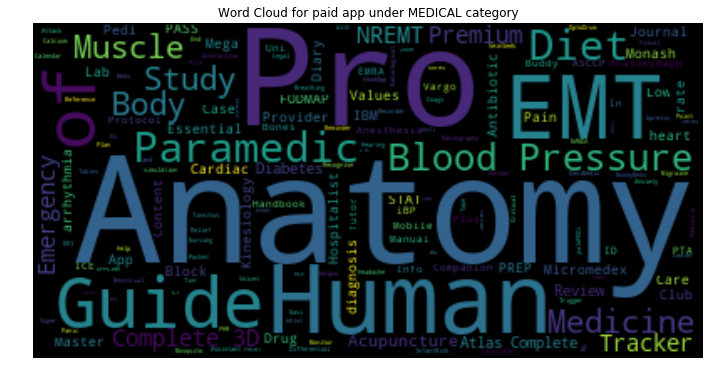

In [50]:
for i in ['FAMILY','GAME','MEDICAL']:
    name_list=" ".join(name for name in paid_app[paid_app['Category']==i].App)
    wordcloud=WordCloud(stopwords=['Game','Medical']).generate(name_list)
    plt.figure(figsize=(12,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title('Word Cloud for paid app under {} category'.format(i))
    plt.show()

For family category, Dragon Quest and Dr Panda are prominent. 
<br>
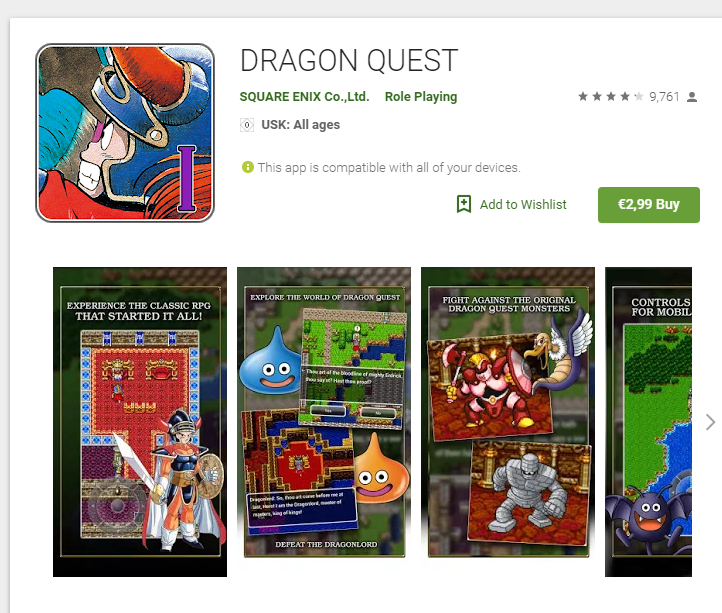

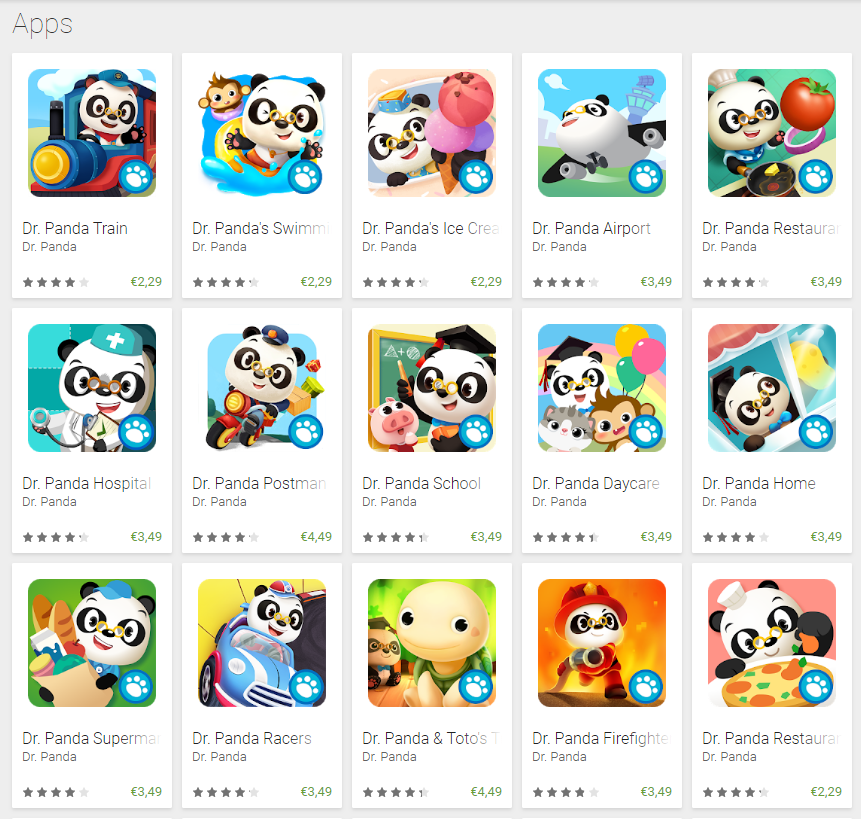

For game category, Five Nights at Freddy is prominent 
<br>
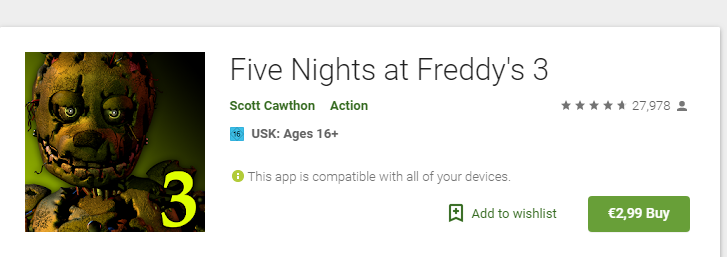

For medical category, "Anatony" word seems the most popular word. Hope only medical students need these apps 

<br>
<br>
It's time for analyzing user review

### Google Play Store User Reviews

In [51]:
data_review=pd.read_csv('googleplaystore_user_reviews.csv')
data_review.head()

App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                NaN   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
2       NaN                 NaN                     NaN  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000

Again, first step is to remove all records with missing values

In [53]:
data_review.dropna(inplace=True)

In [55]:
data_review.shape

(37427, 5)

There are over 37k of reviews 

In [56]:
data_review.head()

App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   
5  10 Best Foods for You                                           Best way   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000  
5  Positive                1.00                0.300000

In [57]:
data_review['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000F4E1B46780>,
      dtype=object)

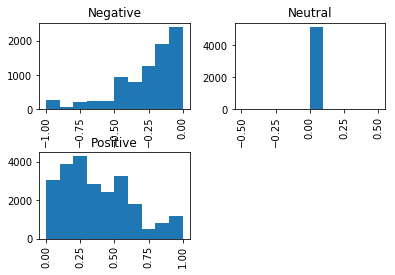

In [60]:
data_review['Sentiment_Polarity'].hist(by=data_review['Sentiment'])

Sentiment is about emotion expressed during the review 
<br>For negative review, Sentiment_Polarity ranges from -1 to 0 
<br>For neutral review, Sentiment_Polarity is 0 
<br>For positive review, Sentiment_polarity ranges from 0 to 1 

Next is to see which apps has most positive and negative reviews

In [63]:
review_sum=data_review.groupby('App').agg({'App':'size','Sentiment_Polarity':'mean'}).rename(columns={'App':'Count','Sentiment_Polarity':'mean'}).reset_index()

In [65]:
review_sum.head()

App  Count      mean
0             10 Best Foods for You    194  0.470733
1  104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室     40  0.392405
2                              11st     39  0.185943
3        1800 Contacts - Lens Store     80  0.318145
4   1LINE – One Line with One Touch     38  0.196290

Because Sentiment_Polarity is affected by number of reviews. Therefore, we only focus apps with at least 100 reviews and then select the three most positive and negative apps 

In [93]:
review_sum_100= review_sum[review_sum['Count']>=100]
review_sum_100.sort_values('mean',ascending=False,inplace=True)
positive3_app = review_sum_100.head(3)
negative3_app=review_sum_100.tail(3)
print(positive3_app)
print('\n')
print(negative3_app)

                            App  Count      mean
0         10 Best Foods for You    194  0.470733
257                         Box    117  0.410001
814  Health and Nutrition Guide    112  0.391511


                       App  Count      mean
395          Cooking Fever    135 -0.042331
335  Candy Crush Soda Saga    166 -0.057079
68                 Agar.io    136 -0.060602


C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Let's see those comments for these six apps 

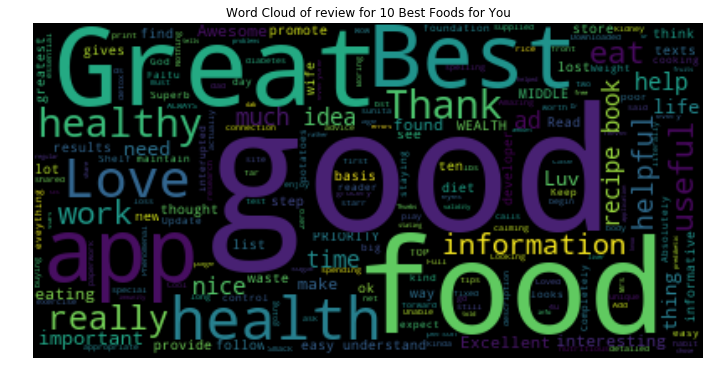

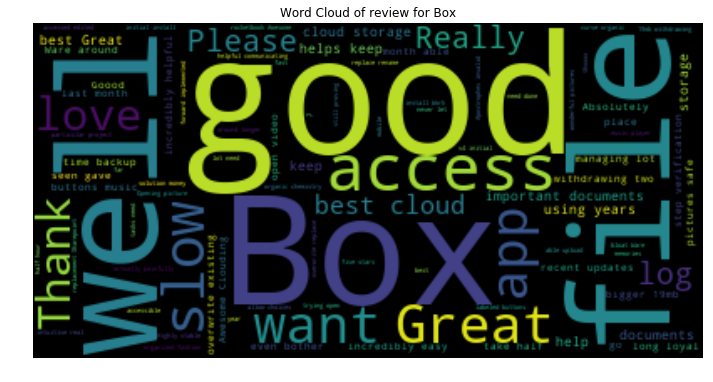

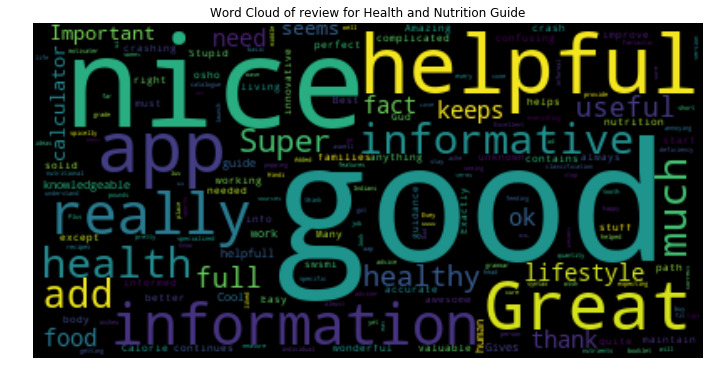

In [96]:
for i in positive3_app['App'].tolist():
    review_list=" ".join(review for review in data_review[data_review['App']==i].Translated_Review)
    wordcloud=WordCloud().generate(review_list)
    plt.figure(figsize=(12,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title('Word Cloud of review for {}'.format(i))
    plt.show()

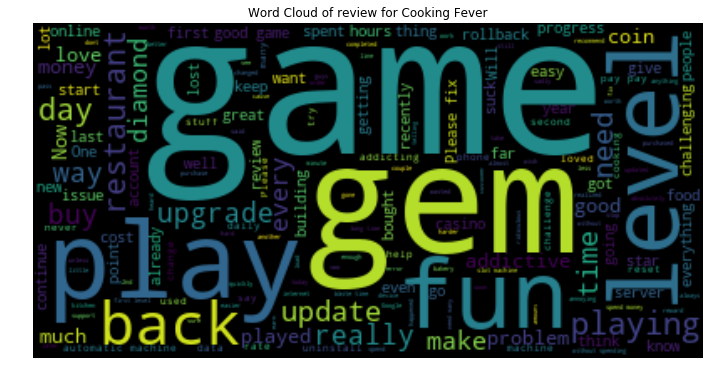

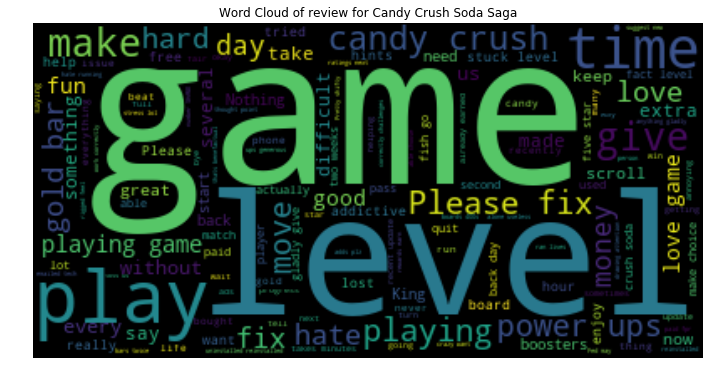

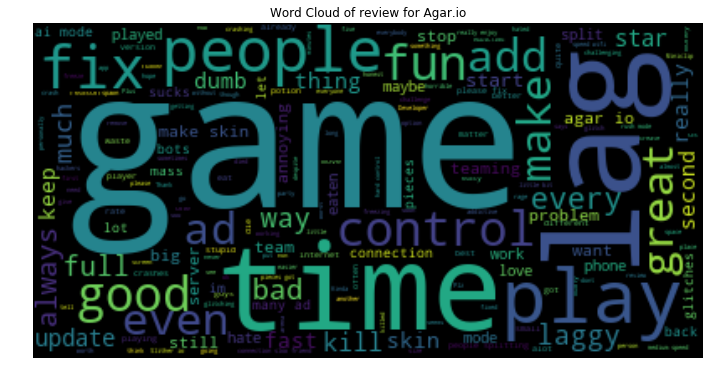

In [97]:
for i in negative3_app['App'].tolist():
    review_list=" ".join(review for review in data_review[data_review['App']==i].Translated_Review)
    wordcloud=WordCloud().generate(review_list)
    plt.figure(figsize=(12,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title('Word Cloud of review for {}'.format(i))
    plt.show()